### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
import warnings
warnings.filterwarnings('ignore')

randomState = 42

## import the data

In [2]:
def addOther(p,folder,filename):
    p = p.ix[700:]
    r = p[p[' Hand Type']=='right']
    l = p[p[' Hand Type']=='left']
    r.set_index(' Frame ID',inplace=True)
    l.set_index(' Frame ID',inplace=True)
    f = pd.DataFrame(pd.merge(l,r, how='left',on=' Frame ID'))
    f = f.drop([' Hand Type_x',' # hands_y' ,' Hand Type_y' ,' # hands_x'],axis=1)
    f.columns = ['Time', ' Position X', ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow Pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength', 'Time r', ' Position X r',
       ' Position Y r', ' Position Z r', ' Velocity X r', ' Velocity Y r',
       ' Velocity Z r', ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r',
       ' Wrist Pos Y r', ' Wrist Pos Z r', ' Elbow Pos X r', ' Elbow Pos Y r',
       ' Elbow Pos Z r', ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r']
    f.drop('Time r', inplace=True,axis=1)
    f.insert(loc=0, column='Name', value=folder)
    if 'Spontan' in filename:
        f.insert(loc=1, column='Type', value='Spontan')
    else:
        if 'Sync' in filename:
            f.insert(loc=1, column='Type', value='Sync')
        else:
            f.insert(loc=1, column='Type', value='Alone')
    return f

In [3]:
def addAlone(p,r,folder):
    p = p.ix[700:]
    r=r[:len(p)-1]
    r = r.reset_index(drop=True)
    p.set_index(' Frame ID',inplace=True)
    p = p.reset_index(drop=True)
    f = pd.concat([p,r],axis=1)
    f = f.drop([' Hand Type',' # hands',' Frame ID'],axis=1)
#     print(ff.columns)
    f.columns = ['Time', ' Position X', ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow Pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength', 'Time r', ' Position X r',
       ' Position Y r', ' Position Z r', ' Velocity X r', ' Velocity Y r',
       ' Velocity Z r', ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r',
       ' Wrist Pos Y r', ' Wrist Pos Z r', ' Elbow Pos X r', ' Elbow Pos Y r',
       ' Elbow Pos Z r', ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r']
    f.drop('Time r', inplace=True,axis=1)
    f.insert(loc=0, column='Name', value=folder)
    f.insert(loc=1, column='Type', value='Alone')
    return f

In [4]:
def upload(path):
    df = pd.DataFrame(columns=
                  ['Name', 'Type','Time', ' Position X', ' Position Y', ' Position Z', ' Velocity X',
       ' Velocity Y', ' Velocity Z', ' Pitch', ' Roll', ' Yaw',
       ' Wrist Pos X', ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow Pos X',
       ' Elbow Pos Y', ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle',
       ' Pinch Strength', ' Position X r', ' Position Y r',
       ' Position Z r', ' Velocity X r', ' Velocity Y r', ' Velocity Z r',
       ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r',
       ' Wrist Pos Y r', ' Wrist Pos Z r', ' Elbow Pos X r',
       ' Elbow Pos Y r', ' Elbow Pos Z r', ' Grab Strenth r',
       ' Grab Angle r', ' Pinch Strength r'])
    r=pd.read_csv('HandRight.csv')
    for filename in os.listdir(path):
        print(filename)
        for fu in os.listdir(path + '\\' + filename):
            x = pd.read_csv(path + '\\' + filename+'\\'+fu)
#         print(fu)
            df = pd.concat([df, addOther(x,filename,fu)]) if 'Alone' not in fu else pd.concat([df, addAlone(x,r,filename)])
    df.reset_index(level=0, inplace=True)
    df.columns = ['Frame ID','Name','Type', 'Time', ' Position X', ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow Pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength', ' Position X r',
       ' Position Y r', ' Position Z r', ' Velocity X r', ' Velocity Y r',
       ' Velocity Z r', ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r',
       ' Wrist Pos Y r', ' Wrist Pos Z r', ' Elbow Pos X r', ' Elbow Pos Y r',
       ' Elbow Pos Z r', ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r']
    df.dropna(inplace=True, axis=0, how="any")
    df = df[df.index % 20 == 0]
    return df

In [5]:
path = r'C:\Users\ido\Desktop\Ariel University\A2\Data visualization\final project\Training'
train = upload(path)

Evyatar Cohen
Nofar Social_Nuero
Oriya Social_Nuero
Orya Kalmanovitz
Revital Marbel
Shahar Terner
Shelly Social_Nuero
Yael Hagai
Yoel Raz


In [6]:
path = r'C:\Users\ido\Desktop\Ariel University\A2\Data visualization\final project\The requirements\Unity Data\Validation'
test = upload(path)

Itiel Lab
Mor SHerman
Oded Medina


## The describe of the data

In [7]:
train.shape

(5082, 40)

In [8]:
train.columns

Index(['Frame ID', 'Name', 'Type', 'Time', ' Position X', ' Position Y',
       ' Position Z', ' Velocity X', ' Velocity Y', ' Velocity Z', ' Pitch',
       ' Roll', ' Yaw', ' Wrist Pos X', ' Wrist Pos Y', ' Wrist Pos Z',
       ' Elbow Pos X', ' Elbow Pos Y', ' Elbow Pos Z', ' Grab Strenth',
       ' Grab Angle', ' Pinch Strength', ' Position X r', ' Position Y r',
       ' Position Z r', ' Velocity X r', ' Velocity Y r', ' Velocity Z r',
       ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r', ' Wrist Pos Y r',
       ' Wrist Pos Z r', ' Elbow Pos X r', ' Elbow Pos Y r', ' Elbow Pos Z r',
       ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r'],
      dtype='object')

In [9]:
# train.isna().sum()

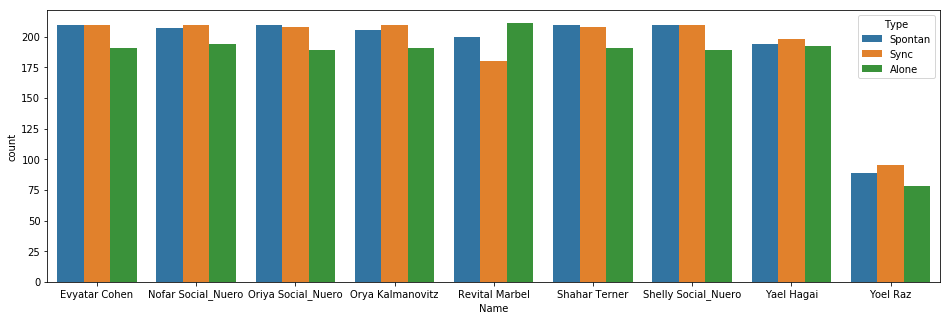

In [10]:
sns.countplot(data=train,x='Name',hue='Type')
fig=plt.gcf()
fig.set_size_inches(16,5)

In [11]:
# sns.heatmap(train.drop(['Type'], axis =1).corr(),annot=True,cmap='RdYlGn')
# fig=plt.gcf()
# fig.set_size_inches(40,30)
# plt.title('Pearson Correlation of Features', size=25)
# plt.show()

In [12]:
# %matplotlib notebook
%matplotlib inline
def comper_l_r(name,p):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x_p_a = np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'X'])
    y_p_a =np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'Y'])
    z_p_a =np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'Z'])

    x_p_r_a =np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'X r'])
    y_p_r_a =np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'Y r'])
    z_p_r_a =np.array(train[(train['Name'] == name) & (train['Type'] == 'Alone')][p+'Z r'])


    x_p_s = np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'X'])
    y_p_s =np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'Y'])
    z_p_s =np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'Y'])

    x_p_r_s =np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'X r'])
    y_p_r_s =np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'Y r'])
    z_p_r_s =np.array(train[(train['Name'] == name) & (train['Type'] == 'Spontan')][p+'Z r'])


    x_p_y = np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+'X'])
    y_p_y =np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+'Y'])
    z_p_y =np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+'Z'])

    x_p_r_y =np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+ 'X r'])
    y_p_r_y =np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+'Y r'])
    z_p_r_y =np.array(train[(train['Name'] == name) & (train['Type'] == 'Sync')][p+'Z r'])


    a = ax.scatter(x_p_a, y_p_a, z_p_a, c='b', marker='o')
    b = ax.scatter(x_p_r_a, y_p_r_a, z_p_r_a, c='b', marker='*')

    c = ax.scatter(x_p_s, y_p_s, z_p_s, c='g', marker='o')
    d = ax.scatter(x_p_r_s, y_p_r_s, z_p_r_s, c='g', marker='*')

    e = ax.scatter(x_p_y, y_p_y, z_p_y, c='y', marker='o')
    f = ax.scatter(x_p_r_y, y_p_r_y, z_p_r_y, c='y', marker='*')

    plt.legend((a, b, c,d,e,f), ('Alone left', 'Alone right', 'Spontan left','Spontan right','Sync left','Sync right'),loc=6)

    ax.set_xlabel(p+'X')
    ax.set_ylabel(p+'Y')
    ax.set_zlabel(p+'Z')
    plt.title('compare between the'+p+'of '+ name + "'s two hands")

    plt.show()

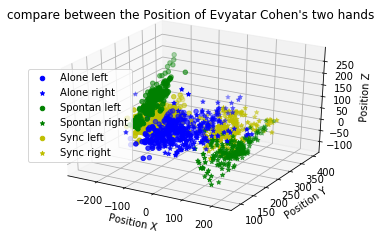

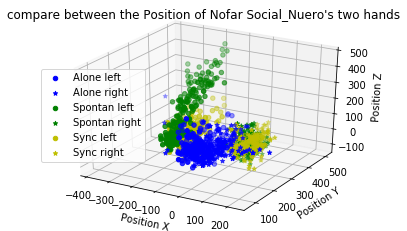

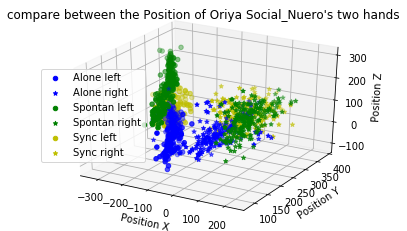

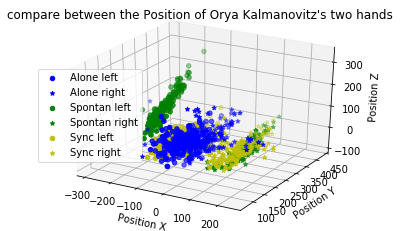

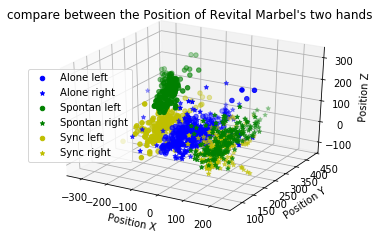

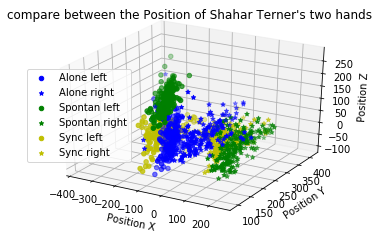

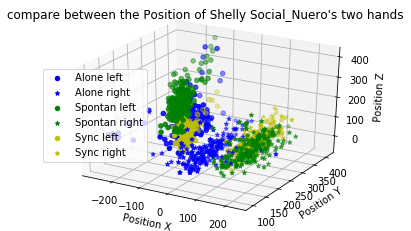

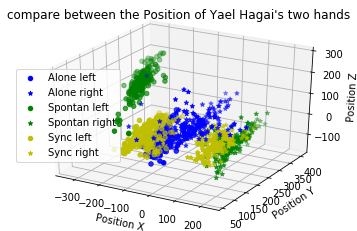

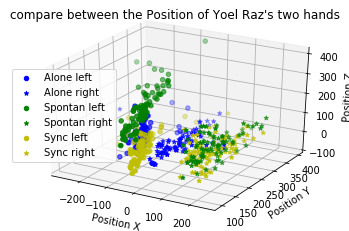

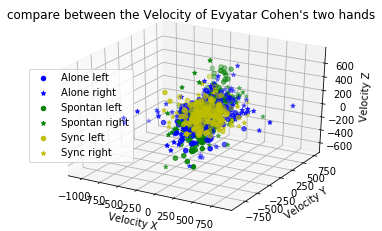

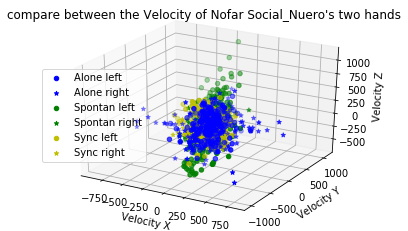

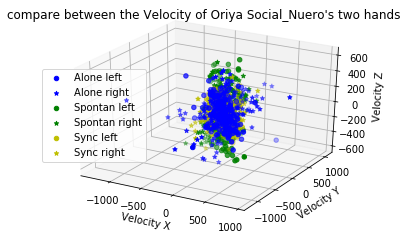

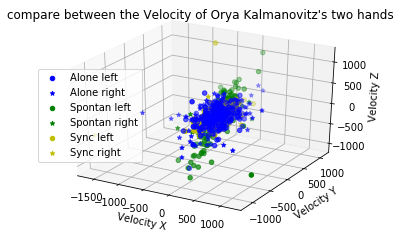

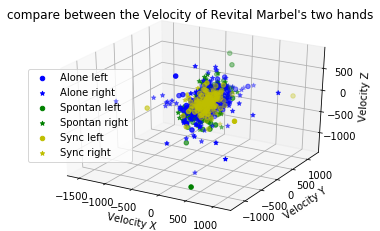

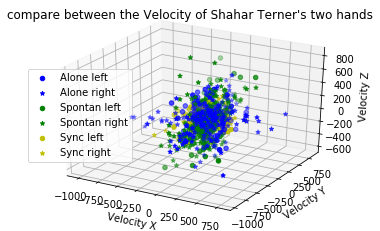

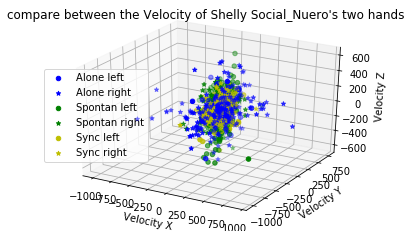

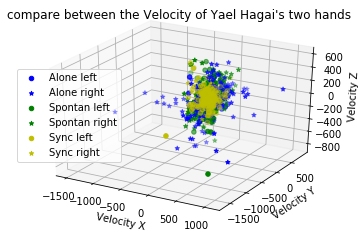

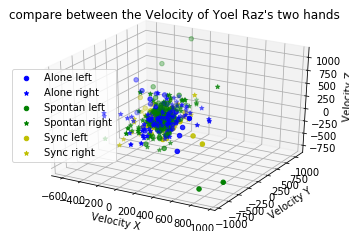

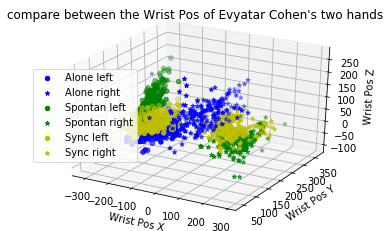

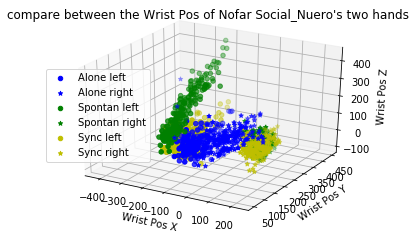

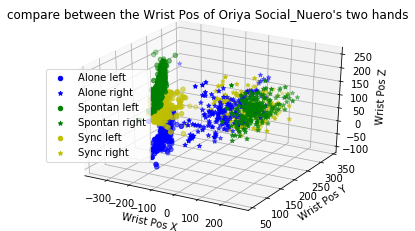

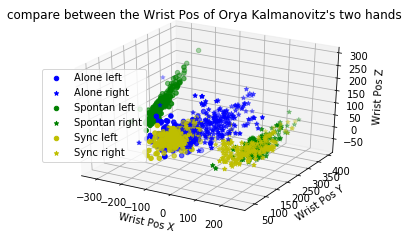

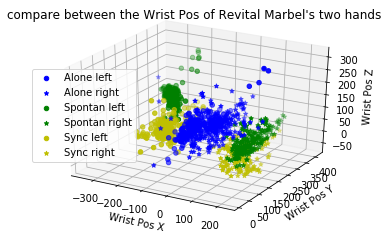

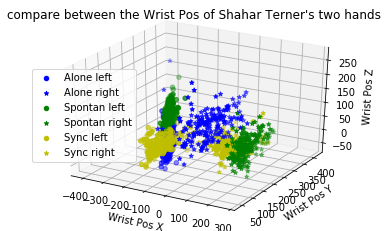

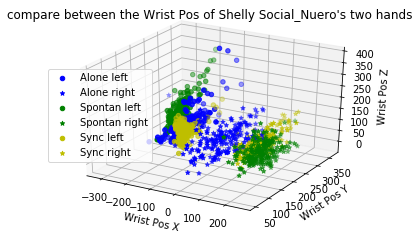

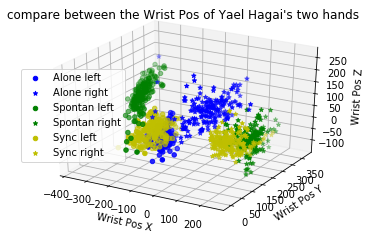

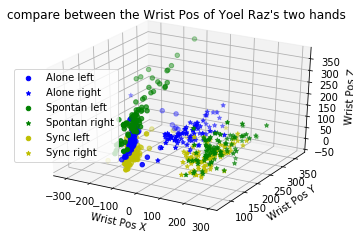

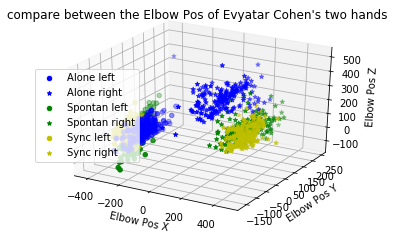

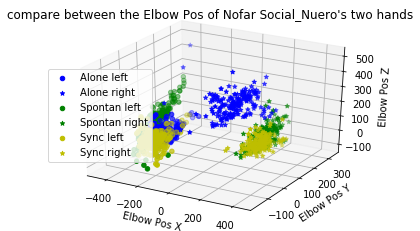

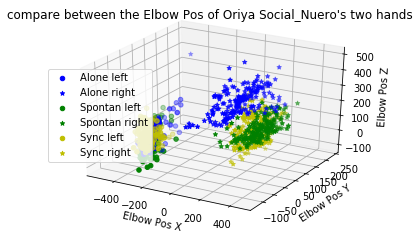

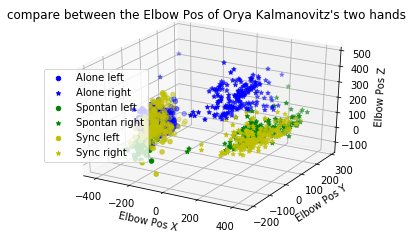

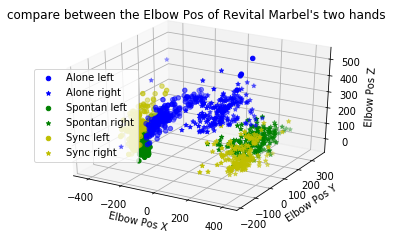

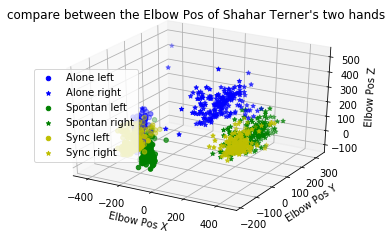

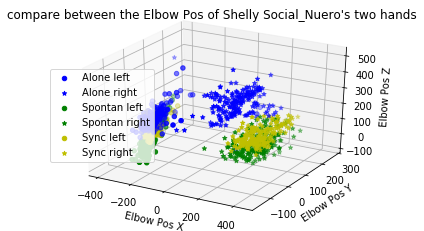

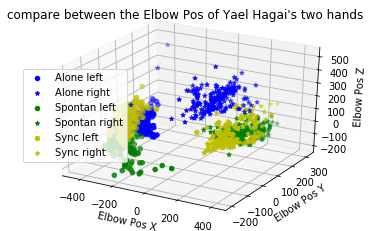

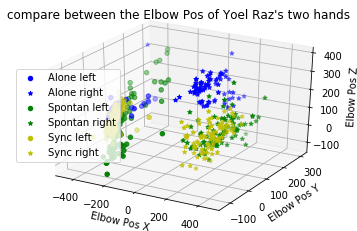

In [13]:
for col in [' Position ' ,' Velocity ',' Wrist Pos ',' Elbow Pos ']:
    for name in train.groupby('Name').count().index:
        comper_l_r(name,col)

In [14]:
# Visualize cluster shapes in 3d.
def r_d(title,hand,name,i_x,i_y,i_z):
    alone=train[(train['Name'] == name) & (train['Type'] == 'Alone')]
    spontan=train[(train['Name'] == name) & (train['Type'] == 'Spontan')]
    sync=train[(train['Name'] == name) & (train['Type'] == 'Sync')]

    scatter1 = dict(
        mode = "markers",
        name = "alone",
        type = "scatter3d",    
        x = alone.as_matrix()[:,i_x], y = alone.as_matrix()[:,i_y], z = alone.as_matrix()[:,i_z],
        marker = dict( size=2, color='green')
    )
    scatter2 = dict(
        mode = "markers",
        name = "spontan",
        type = "scatter3d",    
        x = spontan.as_matrix()[:,i_x], y = spontan.as_matrix()[:,i_y], z = spontan.as_matrix()[:,i_z],
        marker = dict( size=2, color='blue')
    )
    scatter3 = dict(
        mode = "markers",
        name = "sync",
        type = "scatter3d",    
        x = sync.as_matrix()[:,i_x], y = sync.as_matrix()[:,i_y], z = sync.as_matrix()[:,i_z],
        marker = dict( size=2, color='red')
    )
    alone = dict(
        alphahull = 5,
        name = "alone",
        opacity = .1,
        type = "mesh3d",    
        x = alone.as_matrix()[:,i_x], y = alone.as_matrix()[:,i_y], z = alone.as_matrix()[:,i_z],
        color='green', showscale = True
    )
    spontan = dict(
        alphahull = 5,
        name = "spontan",
        opacity = .1,
        type = "mesh3d",    
        x = spontan.as_matrix()[:,i_x], y = spontan.as_matrix()[:,i_y], z = spontan.as_matrix()[:,i_z],
        color='blue', showscale = True
    )
    sync = dict(
        alphahull = 5,
        name = "sync",
        opacity = .1,
        type = "mesh3d",    
        x = sync.as_matrix()[:,i_x], y = sync.as_matrix()[:,i_y], z = sync.as_matrix()[:,i_z],
        color='red', showscale = True
    )
    layout = dict(
        title = title + ' of '+name+"'s " +hand +' hand',
        scene = dict(
            xaxis = dict( zeroline=True ),
            yaxis = dict( zeroline=True ),
            zaxis = dict( zeroline=True ),
        )
    )
    return dict( data=[scatter1, scatter2, scatter3, alone, spontan, sync], layout=layout )
def paint_3d_plot(title,name,i_x,i_y,i_z):
    fig1 = r_d(title,'left',name,i_x,i_y,i_z)
    plotly.offline.iplot(fig1)
    fig2 = r_d(title,'right',name,i_x+18,i_y+18,i_z+18)
    plotly.offline.iplot(fig2)

In [15]:
i=4
for col in ['Position' ,'Velocity','Wrist Pos','Elbow pos']:
    for name in train.groupby('Name').count().index[:2]:
        paint_3d_plot(col,name,i,i+1,i+2)
    i = i+3

In [16]:
def diffrence_betwwen_left_to_right(features):
    fig = plt.figure(figsize=(15, 6))
    i=1
    for f in features:
        ax = fig.add_subplot(1,3,i)
        train.groupby(['Type'])[f, f+' r'].mean().plot(kind='bar', title=f,ax=ax)
        i=i+1

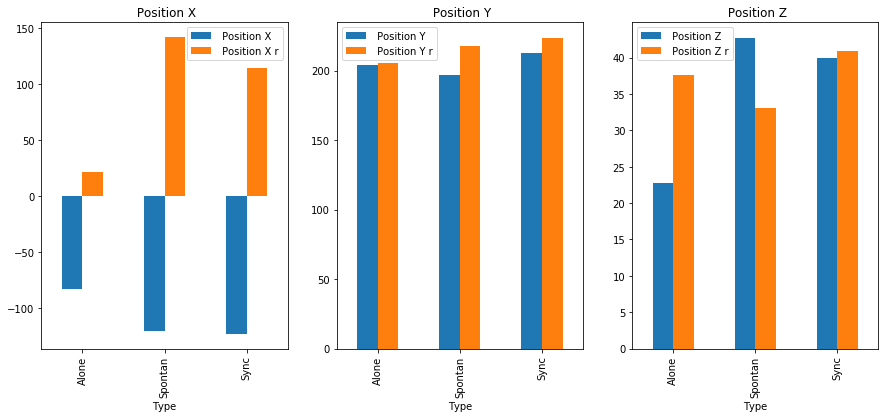

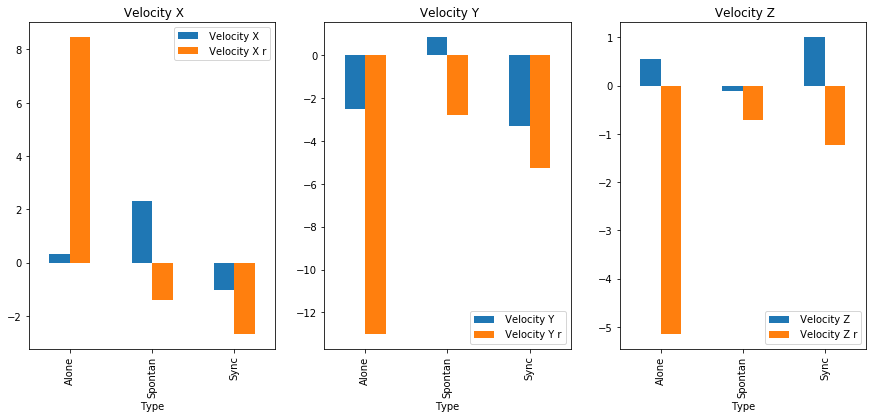

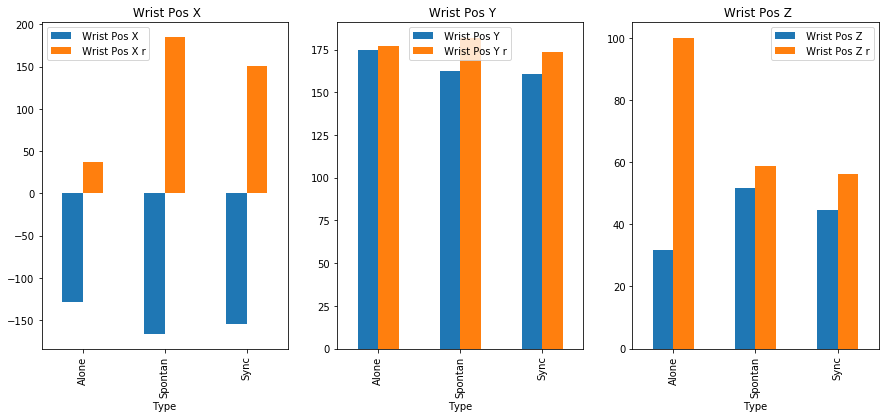

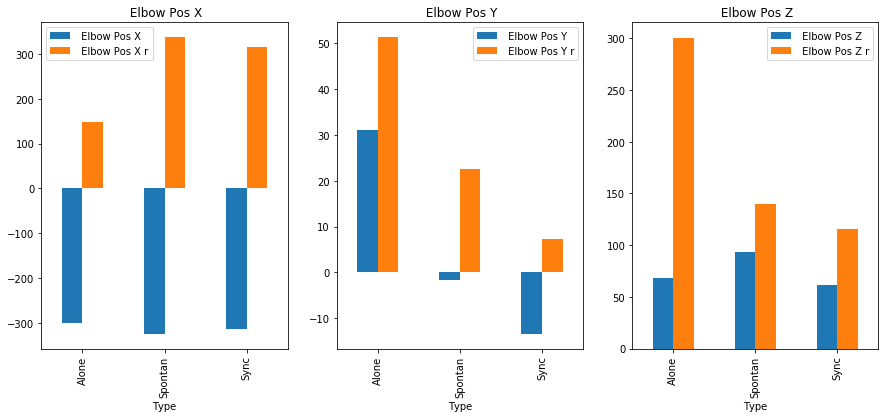

In [17]:
for col in [' Position ',' Velocity ',' Wrist Pos ',' Elbow Pos ']:
    diffrence_betwwen_left_to_right([col+'X',col+'Y',col+'Z'])

let's take a look on the diffrence between the two hands

In [18]:
def difference(x,xr):
    return np.abs(x-xr)
def creat_df_col(col,parm,df):
    return difference(df[col+parm],df[col+parm+' r'])
def creat_diff_df(df):
    diff_df = df[['Name','Type']]
    for col in [' Position',' Velocity']:
        for parm in [' X',' Y',' Z']:
            diff_df[col+parm] = creat_df_col(col,parm,df)    
    for col in [' Pitch',' Roll',' Yaw']:
        diff_df[col] = df[col]-df[col+' r']
    for col in [' Wrist Pos',' Elbow Pos']:
        for parm in [' X',' Y',' Z']:
            diff_df[col+parm] = creat_df_col(col,parm,df)
    for col in [' Grab Strenth',' Grab Angle',' Pinch Strength']:
        diff_df[col] = df[col]-df[col+' r']
    return diff_df

In [19]:
diff_train = creat_diff_df(train)

In [20]:
des = pd.DataFrame()
for col in diff_train.columns[2:]:
    des = pd.concat([des,diff_train.groupby(['Type'])[col].describe()])
from itertools import product
col = list(map(''.join, product([' Position',' Velocity'], [' X',' X',' X',' Y',' Y',' Y',' Z',' Z',' Z'])))
col = col + [' Pitch',' Pitch',' Pitch',
             ' Roll',' Roll',' Roll',
             ' Yaw',' Yaw',' Yaw']
col = col + list(map(''.join, product([' Wrist Pos',' Elbow Pos'], [' X',' X',' X',' Y',' Y',' Y',' Z',' Z',' Z'])))
col = col + [' Grab Strenth',' Grab Strenth',' Grab Strenth',
             ' Grab Angle',' Grab Angle',' Grab Angle',
             ' Pinch Strength',' Pinch Strength',' Pinch Strength']
des.insert(loc=0, column='features', value=col)
des.insert(loc=1, column='Type', value=des.index)
des= des.reset_index(drop=True)# des = des.set_index(['col','Type'])
des = des.drop(['count','25%','50%','75%'],axis=1)

In [21]:
import plotly.express as px
def diff_plot (col):
    fig = px.bar(des, x='features', y=col, color='Type', barmode='group', height=400,title='the '+ col +' diffrence between the two hands')
    fig.show()
diff_plot('mean')
# diff_plot('std')

In [22]:
train.columns

Index(['Frame ID', 'Name', 'Type', 'Time', ' Position X', ' Position Y',
       ' Position Z', ' Velocity X', ' Velocity Y', ' Velocity Z', ' Pitch',
       ' Roll', ' Yaw', ' Wrist Pos X', ' Wrist Pos Y', ' Wrist Pos Z',
       ' Elbow Pos X', ' Elbow Pos Y', ' Elbow Pos Z', ' Grab Strenth',
       ' Grab Angle', ' Pinch Strength', ' Position X r', ' Position Y r',
       ' Position Z r', ' Velocity X r', ' Velocity Y r', ' Velocity Z r',
       ' Pitch r', ' Roll r', ' Yaw r', ' Wrist Pos X r', ' Wrist Pos Y r',
       ' Wrist Pos Z r', ' Elbow Pos X r', ' Elbow Pos Y r', ' Elbow Pos Z r',
       ' Grab Strenth r', ' Grab Angle r', ' Pinch Strength r'],
      dtype='object')

## Feature Selection and setting training and testing

In [23]:
drop = ['Time','Frame ID','Name','Type']
drop = drop + [' Position X',' Position X r']
# drop = drop + [' Pitch',' Roll', ' Yaw',' Pitch r', ' Roll r', ' Yaw r']
# drop = drop +[' Pinch Strength', ' Pinch Strength',
#               ' Pinch Strength r',' Pinch Strength r']
# drop = drop + [' Position Y r',' Position Z']

In [24]:
X_train = train.drop(drop, axis =1)
y_train = train['Type'] #encode the target
X_test = test.drop(drop, axis =1)
y_test = test['Type'] #encode the target

In [25]:
# diff_test = creat_diff_df(test)

In [26]:
# X_train = diff_train.drop(['Name', 'Type'], axis =1)
# y_train = preprocessing.LabelEncoder().fit_transform(diff_train['Type']) #encode the target
# X_test = diff_test.drop(['Name', 'Type'], axis =1)
# y_test = preprocessing.LabelEncoder().fit_transform(diff_test['Type']) #encode the target

In [27]:
#for confusion table
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

## Making predictions using KNN model

let's find the best parameters of k and weight:

In [28]:
# #takes long time to run

# k_range = list(range(20,91))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))
# %matplotlib inline
# plt.plot(k_range, scores)
# plt.grid()
# plt.title('relationship between K and testing accuracy')
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

best n_neighbors: 69

In [29]:
knn = KNeighborsClassifier(n_neighbors= 69)
knn.fit(X_train, y_train)
test_predict = knn.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8497970230040596

### confusion matrix:

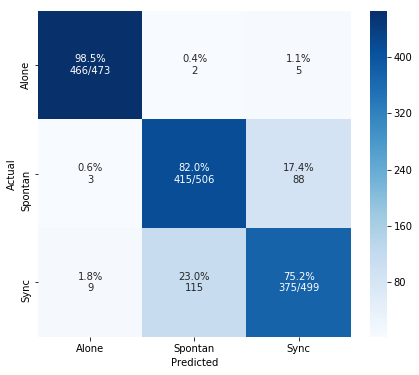

In [30]:
cm_analysis(y_test, test_predict, knn.classes_)

## Making predictions using LogisticRegression model

let's find the best parameters of C and penalty:

In [32]:
# takes long time to run

penalty_option = ['l1', 'l2']
C = np.arange(0.1,0.7, 0.1)
param_grid= dict(C=C, penalty=penalty_option)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=None,scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
# pd_results=pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid.best_params_

{'C': 0.6, 'penalty': 'l1'}

output: {'C': 0.6, 'penalty': 'l1'}

In [33]:
log_reg = LogisticRegression(C= 0.6, penalty= 'l1' ,random_state=randomState)
log_reg.fit(X_train,y_train)
test_predict = log_reg.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8497970230040596

### confusion matrix:

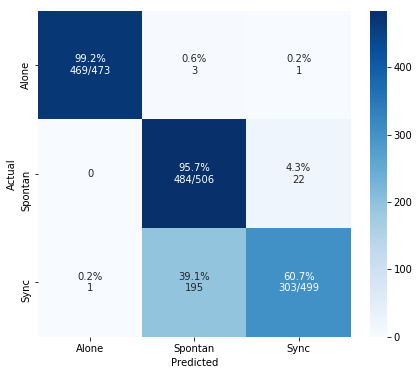

In [34]:
cm_analysis(y_test, test_predict, log_reg.classes_)

## Making predictions using Gaussian Naive Bayes model

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
test_predict = gnb.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8585926928281461

### confusion matrix:

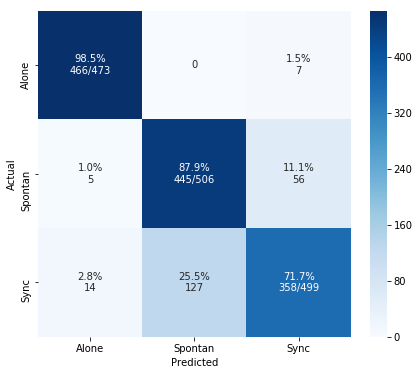

In [37]:
cm_analysis(y_test, test_predict, gnb.classes_)

## Making predictions using Decision Tree model

finding the best parameters of min_samples_split and max_depth:

In [39]:
# # takes long time to run

# min_samples_split = np.arange(10,100,10)
# max_depth = np.arange(1,10,1)

# df = pd.DataFrame(columns=('scores', 'min_samples_split', 'max_depth'))
# scores = []
# i=0
# for s in min_samples_split:
#     for d in max_depth:
#         dec = tree.DecisionTreeClassifier(min_samples_split=s,max_depth=d,random_state=randomState)
#         dec.fit(X_train, y_train)
#         y_pred = dec.predict(X_test)
#         df.loc[i] = [ metrics.accuracy_score(y_test, y_pred) , s, d]
#         i += 1
# df.sort_values(by=['scores'], ascending=False).head()

output:

| scores | min_samples_split | max_depth |
| --- | --- | --- |
| 0.858593 | 70 | 6 |
| 0.857916 | 90 | 6 |
| 0.857916 | 80 | 6 |
| 0.857240 | 30 | 5 |
| 0.857240 | 20 | 5 |

### Making the prediction:

In [40]:
dec = tree.DecisionTreeClassifier(min_samples_split=70,max_depth=6,random_state=randomState)
dec.fit(X_train,y_train)
test_predict = dec.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8585926928281461

### confusion matrix:

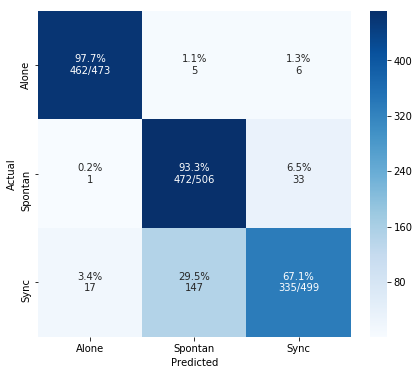

In [41]:
cm_analysis(y_test, test_predict, dec.classes_)

## Making predictions using RandomForest model

In [43]:
# d_range = list(range(30, 65))
# d_scores = []
# for d in d_range:
#     rfc = RandomForestClassifier(n_estimators=d,random_state=randomState)
#     rfc.fit(X_train, y_train)
#     d_scores.append(rfc.score(X_test,y_test))

# plt.plot(d_range, d_scores)
# plt.grid()
# plt.xlabel('Value of n_estimators for rfc')
# plt.ylabel('Cross-Validated Accuracy')

In [44]:
# # takes long time to run 

# d_range = list(range(30, 65))
# max_depth = np.append(np.arange(1,10,1),None)

# df = pd.DataFrame(columns=('scores', 'd_range', 'max_depth'))
# scores = []
# i=0
# for r in d_range:
#     for d in max_depth:
#         rfc = RandomForestClassifier(n_estimators=r, max_depth=d,random_state=randomState)
#         rfc.fit(X_train, y_train)
#         y_pred = rfc.predict(X_test)
#         df.loc[i] = [ metrics.accuracy_score(y_test, y_pred) , r, d]
#         i += 1
# df.sort_values(by=['scores'], ascending=False).head()

output:

| scores | d_range | max_depth |
| --- | --- | --- |
| 0.889716 | 64 | NaN |
| 0.889716 | 63 | NaN |
| 0.888363 | 43 | NaN |
| 0.888363 | 41 | NaN |
| 0.887686 | 59 | NaN |

In [45]:
rfc = RandomForestClassifier(n_estimators = 63 ,random_state=randomState)
rfc.fit(X_train,y_train)
test_predict = rfc.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8897158322056834

### confusion matrix:

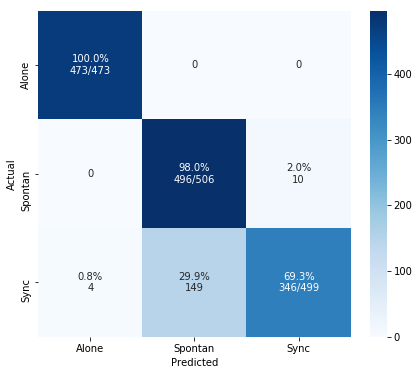

In [46]:
cm_analysis(y_test, test_predict, rfc.classes_)

## Making predictions using Adaboost model

In [48]:
# # takes long time to run 

# n_estimators = np.arange(50,200,50)
# learning_rate = [0.001,0.01,0.1,1]

# df = pd.DataFrame(columns=('scores', 'n_estimators', 'learning_rate'))
# scores = []
# i=0
# for n in n_estimators:
#     for l in learning_rate:
#         ada=AdaBoostClassifier(rfc,n_estimators=n,learning_rate=l,random_state=randomState)
#         ada.fit(X_train, y_train)
#         y_pred = ada.predict(X_test)
#         df.loc[i] = [ metrics.accuracy_score(y_test, y_pred) , n, l]
#         i += 1
# df.sort_values(by=['scores'], ascending=False).head()

output:

| scores | n_estimators | learning_rate |
| --- | --- | --- |
| 0.876184 | 50 | 0.001 |
| 0.876184 | 50 | 0.010 |
| 0.876184 | 50 | 0.100 |
| 0.876184 | 50 | 1.000 |
| 0.876184 | 100 | 0.001 |

In [49]:
abc = AdaBoostClassifier(rfc,n_estimators=50,learning_rate=0.001 ,random_state=randomState)
abc.fit(X_train, y_train)
test_predict = abc.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8761840324763194

### confusion matrix:

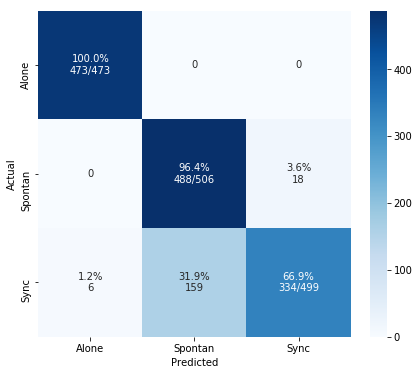

In [50]:
cm_analysis(y_test, test_predict, abc.classes_)

## Making predictions using PCA model

In [52]:
names = ["k-Nearest Neighbors","Decision Tree","AdaBoost","Gaussian Naive Bayes","Logistic Regression","Random Forest"]

algorithms = [knn, dec, abc, gnb, log_reg, rfc]
classifiers = {  "k-Nearest Neighbors" : knn,
                 "Decision Tree" : dec,
                 "AdaBoost" : abc,
                 "Gaussian Naive Bayes" : gnb,
                 "Logistic Regression" : log_reg,
              }
# X_train = train.drop(train.columns[:4],axis=1)
# X_test = test.drop(test.columns[:4],axis=1)

In [53]:
# all_components = pd.DataFrame(index=names)
# for n in np.arange(1,len(X_train.columns)+1,1):
#     sys.stdout.write(str(n)+'...')
#     if (n==32):
#         print ('done')
#     score=[]
#     pca = PCA(n_components=n)
#     pca_train = pca.fit_transform(X_train)  
#     pca_test = pca.transform(X_test)
#     for model in algorithms:
#         model.fit(pca_train,y_train)
#         pred_test = model.predict(pca_test)
#         score.append(metrics.accuracy_score(pred_test, y_test))
#     score = pd.DataFrame(score, index=names)   
#     score.columns=[n]
#     all_components = pd.concat([all_components,score],axis=1, join='inner')
# all_components = all_components.transpose()

In [54]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# all_components.style.apply(highlight_max)

In [55]:
# _= all_components.plot(subplots=True, figsize=(10, 9))

## Making predictions using Voting Classifier model

In [56]:
classifiers = [('knn', knn),('dtc',dec),('abc',abc),('gnb',gnb),('log', log_reg),('rfc',rfc)]

In [57]:
# # takes very long time to run

# df = pd.DataFrame(columns=('w1', 'w2', 'w3','w4','w5','w6', 'score'))

# i = 0
# for w1 in range(0,5):
#     for w3 in range(1,6):
#         for w4 in range(0,5):
#             for w5 in range(0,5):
#                 for w6 in range(1,6):
                    
#                         if len(set((w1,w3,w4,w5,w6))) == 1: # skip if all weights are equal
#                             continue
#                         vc = VotingClassifier(classifiers, weights=[w1,0,w3,w4,w5,w6])
#                         vc.fit(X_train,y_train)
#                         y_pred = vc.predict(X_test)
#                         df.loc[i] = [w1, 0, w3,w4,w5,w6, metrics.accuracy_score(y_test, y_pred)]
#                         print(df.loc[i])
#                         i += 1
# df.sort_values(by=['score'], ascending=False).head()

| w1 | w2 | w3 | w4 | w5 | w6 | score |
| --- | --- | --- | --- | --- | --- | --- |
| 3 | 0 | 2 | 2 | 0 | 2 | 0.896482 |
| 4 | 0 | 2 | 2 | 0 | 3 | 0.896482 |
| 4 | 0 | 3 | 3 | 0 | 3 | 0.896482 |
| 4 | 0 | 3 | 2 | 1 | 3 | 0.896482 |
| 2 | 0 | 1 | 3 | 1 | 4 | 0.895805 |

In [58]:
# show ratio

# from IPython.display import Image
# Image("groupby_score.png")

In [59]:
scores = []
for model in algorithms:
    model.fit(X_train,y_train)
    test_predict = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, test_predict))
scores = pd.DataFrame(scores, index=names,columns=['Accuracy'])
scores.style.apply(highlight_max)

In [60]:
vc = VotingClassifier(classifiers, voting='hard',weights=[3,0,2,2,0,2])
# vc = VotingClassifier(classifiers, voting='hard',weights=[3.75,0,2.5,2.25,0.25,2.75])

In [61]:
vc.fit(X_train,y_train)
test_predict = vc.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8964817320703654

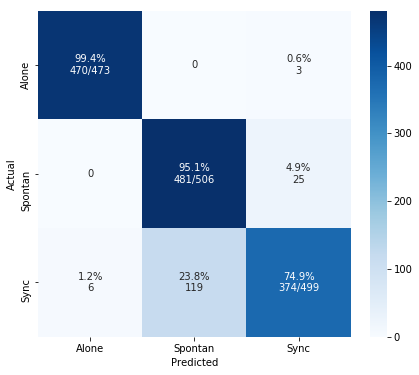

              precision    recall  f1-score   support

       Alone       0.99      0.99      0.99       473
     Spontan       0.80      0.95      0.87       506
        Sync       0.93      0.75      0.83       499

   micro avg       0.90      0.90      0.90      1478
   macro avg       0.91      0.90      0.90      1478
weighted avg       0.90      0.90      0.90      1478



In [62]:
cm_analysis(y_test, test_predict, vc.classes_)
print(classification_report(y_test, test_predict))

- micro average (averaging the total true positives, false negatives and false positives).
- macro average (averaging the unweighted mean per label).
- weighted average (averaging the support-weighted mean per label).

In [63]:
print('f-measure:' ,metrics.f1_score(y_test, test_predict, average= 'weighted'))

f-measure: 0.8950593541605874


In [64]:
vc1 = VotingClassifier(classifiers, voting='hard',weights=[4,0,3,2,1,3])
vc1.fit(X_train,y_train)
test_predict = vc1.predict(X_test)
metrics.accuracy_score(y_test, test_predict)

0.8964817320703654

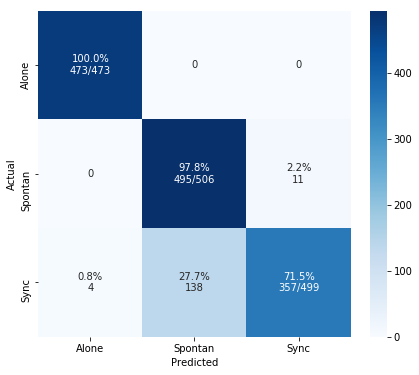

              precision    recall  f1-score   support

       Alone       0.99      1.00      1.00       473
     Spontan       0.78      0.98      0.87       506
        Sync       0.97      0.72      0.82       499

   micro avg       0.90      0.90      0.90      1478
   macro avg       0.91      0.90      0.90      1478
weighted avg       0.91      0.90      0.89      1478



In [65]:
cm_analysis(y_test, test_predict, vc1.classes_)
print(classification_report(y_test, test_predict))

In [66]:
print('f-measure:' ,metrics.f1_score(y_test, test_predict, average= 'weighted'))

f-measure: 0.8942871756668466


In [67]:
# import pandas_profiling
# pandas_profiling.ProfileReport(train)